https://discourse.pymc.io/t/how-to-use-a-densitydist-in-a-mixture/1371/

In [1]:
%pylab inline
import pymc3 as pm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sd, mu]
100%|██████████| 2000/2000 [00:01<00:00, 1329.91it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


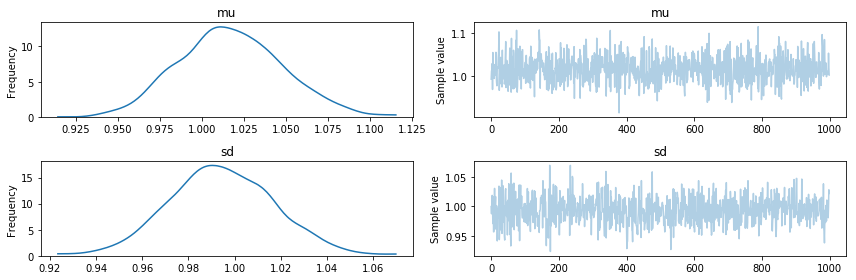

In [2]:
d1 =  np.random.normal(loc=1,scale=1,size=1000) # toy data set

with pm.Model() as model:
    mu = pm.HalfNormal('mu',sd=1,shape=1)
    sd = pm.HalfNormal('sd',sd=1,shape=1)
    g = pm.Normal.dist(mu=mu,sd=sd,shape=1)
    obs = pm.DensityDist('obs',logp=g.logp,random=g.random,observed=d1)
    trace = pm.sample(draws=1000, tune=1000,chains=1)
    
pm.traceplot(trace);
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [w, comp, sd, mu]
100%|██████████| 2000/2000 [00:11<00:00, 172.87it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


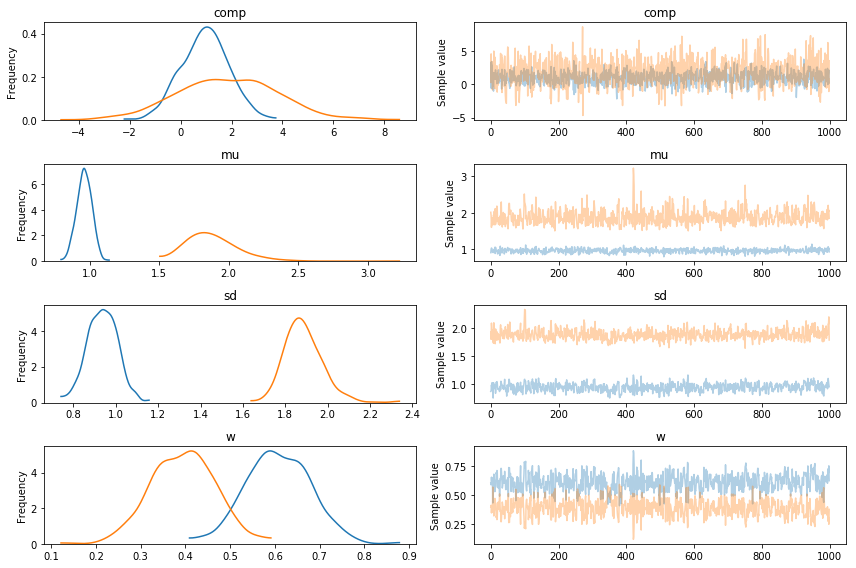

In [4]:
# toy dataset
d1 = np.random.normal(loc=1, scale=1, size=1000)
d2 = np.random.normal(loc=2, scale=2, size=500)
data = np.concatenate([d1, d2])  # a bimodal toy data set

with pm.Model() as model:
    mu = pm.HalfNormal('mu', sd=1, shape=2)
    sd = pm.HalfNormal('sd', sd=1, shape=2)
    g = pm.Normal.dist(mu=mu, sd=sd, shape=2)
    
    comp = pm.DensityDist('comp', logp=g.logp, random=g.random, shape=2)
    comp_dists = comp.distribution
    comp_dists.mean = comp_dists.mode = g.mean#np.array([0, 0])
    
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    mix = pm.Mixture('mix', w=w, comp_dists=comp_dists, observed=data)

    trace = pm.sample(draws=1000, tune=1000, chains=1)

pm.traceplot(trace)
plt.show()